ALY 6040: Data Mining Applications

Author: Pei-Yu Jheng

Dataset: Netflix user's information

Instructor: Justin Grosz

February 22,2024

In [2]:
#Install and Import necessary libraries
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Load Dataset
df = pd.read_csv('Netflix_Modeling.csv', header = 0) 
df

      User ID       Date       Day                   Show  Season  Episode  \
0       62565   2/9/2019  Saturday        Stranger Things     2.0     10.0   
1      108824   2/9/2019  Saturday        Stranger Things     1.0      4.0   
2      118833   2/9/2019  Saturday        Stranger Things     2.0      8.0   
3       97717   2/9/2019  Saturday        Stranger Things     2.0      6.0   
4       35588   2/9/2019  Saturday        Stranger Things     2.0     10.0   
...       ...        ...       ...                    ...     ...      ...   
2999    92883  2/12/2019   Tuesday  American Horror Story     3.0      7.0   
3000    72774  2/12/2019   Tuesday  American Horror Story     1.0      9.0   
3001     7517  2/12/2019   Tuesday  American Horror Story     2.0      9.0   
3002    16293  2/12/2019   Tuesday  American Horror Story     3.0      1.0   
3003   118974  2/12/2019   Tuesday  American Horror Story     2.0      3.0   

      Time Watched  Gender  Completed  Time of Day  
0         

# Data Cleaning

### 1. Display summary statistics and data types

In [114]:
# Display the statistical summary
df.describe()

,User ID,Season,Episode,Time Watched,Completed,Time of Day
count,3004.000000,2969.000000,2986.000000,2987.000000,2957.000000,2904.000000
mean,62342.952064,2.788144,5.489618,24.171075,0.264457,0.494835
std,36065.318815,1.836268,2.884033,16.371438,0.441118,0.500059
min,66.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,30984.750000,1.000000,3.000000,11.000000,0.000000,0.000000
50%,62082.500000,2.000000,6.000000,21.000000,0.000000,0.000000
75%,93862.000000,4.000000,8.000000,34.000000,1.000000,1.000000
max,124938.000000,10.000000,10.000000,90.000000,1.000000,1.000000


In [4]:
print("The datatype of each column:")
print(df.dtypes)

The datatype of each column:
User ID           int64
Date             object
Day              object
Show             object
Season          float64
Episode         float64
Time Watched    float64
Gender           object
Completed       float64
Time of Day     float64
dtype: object


### 2. Checking the Missing Value

In [116]:
#Find the missing value in each column
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)

#Find the Number of rows in the dataset
num_rows = df.shape[0]
print("Number of rows in the dataset:", num_rows)

Missing values in each column:
User ID           0
Date              0
Day               0
Show              0
Season           35
Episode          18
Time Watched     17
Gender           99
Completed        47
Time of Day     100
dtype: int64
Number of rows in the dataset: 3004


In [117]:
#Calculate the % of missing value in each column to total rows

missing_values_percentage = (df.isna().sum() / len(df)) * 100
missing_values_percentage_formatted = missing_values_percentage.map("{:.2f}%".format)
print("Percentage of missing values in each column relative to total rows:")
print(missing_values_percentage_formatted)

Percentage of missing values in each column relative to total rows:
User ID         0.00%
Date            0.00%
Day             0.00%
Show            0.00%
Season          1.17%
Episode         0.60%
Time Watched    0.57%
Gender          3.30%
Completed       1.56%
Time of Day     3.33%
dtype: object


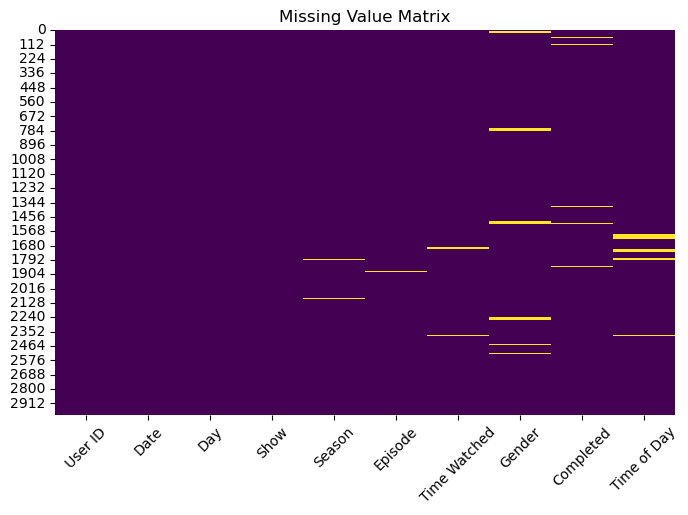

In [119]:
# Create a boolean DataFrame indicating missing values
missing_values_matrix = df.isnull()

# Plot the missing value matrix as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(missing_values_matrix, cbar=False, cmap='viridis')
plt.title('Missing Value Matrix')
plt.xticks(rotation=45)
plt.show()

### 3. Desicion Making
### For the Top 1 missing value % variable: Time of Day
### We won't analyze the "Time of Day" column and it has the most missing value in the dataset; Therefore, we decided to drop this column, so that we can keep the remaining data in other columns.

In [120]:
# Drop column 'Time of Day'
df = df.drop('Time of Day', axis=1)

# Display the modified DataFrame
df

,User ID,Date,Day,Show,Season,Episode,Time Watched,Gender,Completed
0,62565,2/9/2019,Saturday,Stranger Things,2.0,10.0,59.0,Female,1.0
1,108824,2/9/2019,Saturday,Stranger Things,1.0,4.0,40.0,Female,0.0
2,118833,2/9/2019,Saturday,Stranger Things,2.0,8.0,51.0,Male,1.0
3,97717,2/9/2019,Saturday,Stranger Things,2.0,6.0,10.0,Male,0.0
4,35588,2/9/2019,Saturday,Stranger Things,2.0,10.0,40.0,Female,1.0
...,...,...,...,...,...,...,...,...,...
2999,92883,2/12/2019,Tuesday,American Horror Story,3.0,7.0,13.0,Male,0.0
3000,72774,2/12/2019,Tuesday,American Horror Story,1.0,9.0,24.0,Male,0.0
3001,7517,2/12/2019,Tuesday,American Horror Story,2.0,9.0,26.0,Male,1.0
3002,16293,2/12/2019,Tuesday,American Horror Story,3.0,1.0,23.0,Male,0.0


### For the Top 2 missing value % variable: Gender
### Replacing missing values in the "Gender" variable with the most frequent gender within each show.

In [121]:
# Replace missing values with the mode within each show
df['Gender'] = df.groupby('Show')['Gender'].transform(lambda x: x.fillna(x.mode().iloc[0]))

# Check for missing values in the 'Gender' column
missing_gender = df['Gender'].isnull().sum()

print(f"Number of missing values in 'Gender' column: {missing_gender}")

Number of missing values in 'Gender' column: 0


### For the rest of the variables contain missing value: Season, Episode, Time Watched  , and Completed
### Since the rest of the missing values' proportions are all less than 3% which is only tiny proportion for this dataset, we decided to drop these missing values.

In [122]:
# Drop rows with missing values in the original DataFrame
df.dropna(inplace=True)

# Print the modified DataFrame
print(df)

      User ID       Date       Day                   Show  Season  Episode  \
0       62565   2/9/2019  Saturday        Stranger Things     2.0     10.0   
1      108824   2/9/2019  Saturday        Stranger Things     1.0      4.0   
2      118833   2/9/2019  Saturday        Stranger Things     2.0      8.0   
3       97717   2/9/2019  Saturday        Stranger Things     2.0      6.0   
4       35588   2/9/2019  Saturday        Stranger Things     2.0     10.0   
...       ...        ...       ...                    ...     ...      ...   
2999    92883  2/12/2019   Tuesday  American Horror Story     3.0      7.0   
3000    72774  2/12/2019   Tuesday  American Horror Story     1.0      9.0   
3001     7517  2/12/2019   Tuesday  American Horror Story     2.0      9.0   
3002    16293  2/12/2019   Tuesday  American Horror Story     3.0      1.0   
3003   118974  2/12/2019   Tuesday  American Horror Story     2.0      3.0   

      Time Watched  Gender  Completed  
0             59.0  Fem

In [123]:
#Check the missing value in each column are all droped
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)
print('Remaining rows after drop missing data rows:')
print(df.shape[0])

Missing values in each column:
User ID         0
Date            0
Day             0
Show            0
Season          0
Episode         0
Time Watched    0
Gender          0
Completed       0
dtype: int64
Remaining rows after drop missing data rows:
2891


# Data Hypothesis Exploration

# Q1: Which gender, male or female, tends to enjoy watching each show more, and what is the difference in their viewing preferences?

In [124]:
# Pivot the data to display the number of views for each show and gender combination
views_pivot_df = df.pivot_table(index='Show', columns='Gender', values='User ID', aggfunc='count').reset_index()

# Rename the columns for clarity
views_pivot_df.columns.name = None

# Print the result
print(views_pivot_df)

                      Show  Female  Male
0    American Horror Story     322   326
1                  Friends     158   145
2  Orange Is The New Black     314   346
3              Parks & Rec     167   180
4          Stranger Things     520   413


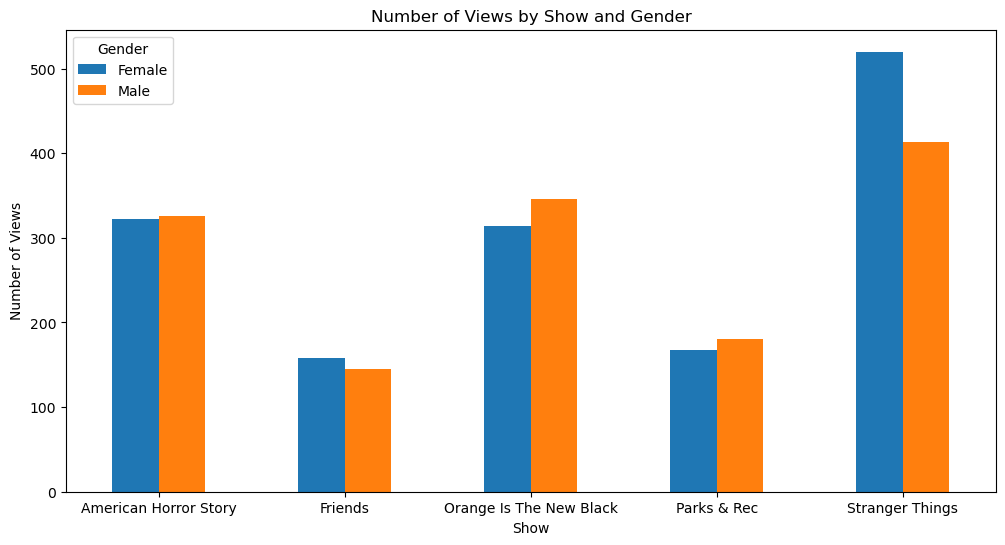

In [125]:
# Plot the result
views_pivot_df.plot(x='Show', kind='bar', figsize=(12, 6))
plt.title('Number of Views by Show and Gender')
plt.xlabel('Show')
plt.ylabel('Number of Views')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

# Q2: What is the number of views for each season and episode of 'Stranger Things'

In [126]:
# Filter the DataFrame for only 'Stranger Things'
stranger_things_df = df[df['Show'] == 'Stranger Things']

# Calculate the number of views for each season and episode
views_per_season_episode = stranger_things_df.groupby(['Season', 'Episode']).size().reset_index(name='Number of Views')

# Print the result
print(views_per_season_episode)

    Season  Episode  Number of Views
0      1.0      1.0               45
1      1.0      2.0               49
2      1.0      3.0               31
3      1.0      4.0               47
4      1.0      5.0               45
5      1.0      6.0               36
6      1.0      7.0               44
7      1.0      8.0               50
8      1.0      9.0               45
9      1.0     10.0               27
10     2.0      1.0               58
11     2.0      2.0               63
12     2.0      3.0               40
13     2.0      4.0               48
14     2.0      5.0               50
15     2.0      6.0               54
16     2.0      7.0               50
17     2.0      8.0               55
18     2.0      9.0               44
19     2.0     10.0               52


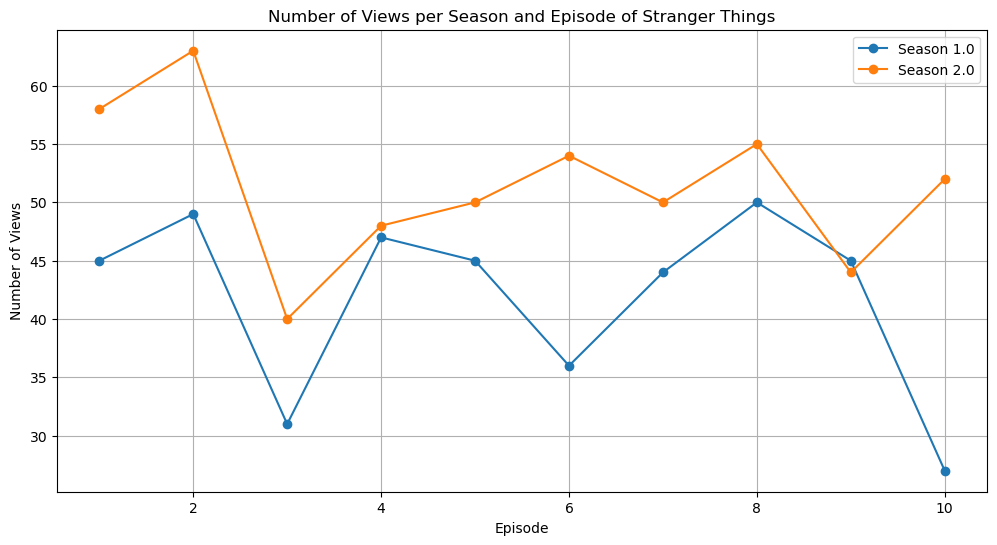

In [127]:
# Create a line chart
plt.figure(figsize=(12, 6))
for season in views_per_season_episode['Season'].unique():
    season_data = views_per_season_episode[views_per_season_episode['Season'] == season]
    plt.plot(season_data['Episode'], season_data['Number of Views'], marker='o', label=f'Season {season}')

plt.xlabel('Episode')
plt.ylabel('Number of Views')
plt.title('Number of Views per Season and Episode of Stranger Things')
plt.legend()
plt.grid()
plt.show()

# Q3: How does the total time watched vary by day for the dataset?

In [128]:
# Convert 'Day' column to a categorical type with specified order
day_order = ['Monday', 'Tuesday', 'Saturday', 'Sunday']
df['Day'] = pd.Categorical(df['Day'], categories=day_order, ordered=True)

# Sort the DataFrame based on the 'Day' column
df_sorted = df.sort_values(by='Day')

# Print the sorted DataFrame
df_sorted

,User ID,Date,Day,Show,Season,Episode,Time Watched,Gender,Completed
1491,28005,2/11/2019,Monday,Stranger Things,2.0,7.0,52.0,Female,1.0
1983,69652,2/11/2019,Monday,Parks & Rec,5.0,1.0,19.0,Female,0.0
1984,29746,2/11/2019,Monday,Parks & Rec,1.0,1.0,27.0,Male,1.0
1985,123010,2/11/2019,Monday,Parks & Rec,1.0,10.0,16.0,Male,0.0
1986,92851,2/11/2019,Monday,Parks & Rec,4.0,6.0,27.0,Male,1.0
...,...,...,...,...,...,...,...,...,...
990,32671,2/10/2019,Sunday,Friends,5.0,1.0,13.0,Female,0.0
991,67017,2/10/2019,Sunday,Friends,9.0,5.0,21.0,Male,0.0
992,41309,2/10/2019,Sunday,Friends,1.0,3.0,4.0,Female,0.0
1107,83315,2/10/2019,Sunday,Orange Is The New Black,2.0,5.0,39.0,Female,0.0


In [129]:
# Calculate the total time watched for each day
time_watched_per_day = df_sorted.groupby('Day')['Time Watched'].sum().reset_index()

print(time_watched_per_day)

        Day  Time Watched
0    Monday       16438.0
1   Tuesday       18744.0
2  Saturday       17163.0
3    Sunday       17455.0


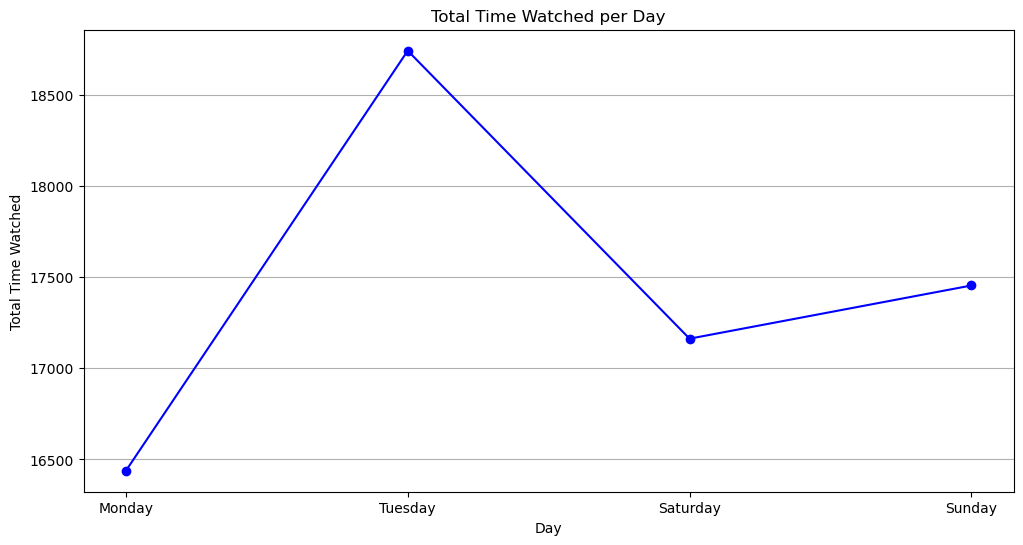

In [130]:
# Create a dot plot
plt.figure(figsize=(12, 6))
plt.plot(time_watched_per_day['Day'], time_watched_per_day['Time Watched'], marker='o', linestyle='-', color='b')
plt.xlabel('Day')
plt.ylabel('Total Time Watched')
plt.title('Total Time Watched per Day')
plt.grid(axis='y')
plt.show()

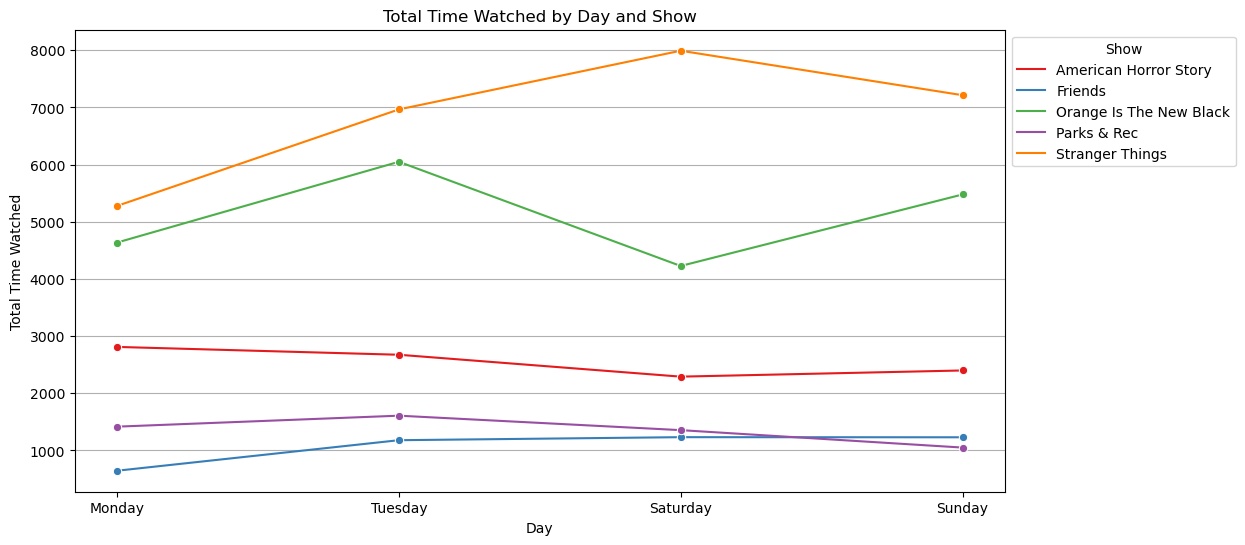

In [131]:
# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Time Watched', hue='Show', data=time_watched_per_day_show, marker='o', palette='Set1')
plt.xlabel('Day')
plt.ylabel('Total Time Watched')
plt.title('Total Time Watched by Day and Show')
plt.legend(title='Show', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

                                               Thank You So Much !!